In [18]:
import seaborn as sns

iris = sns.load_dataset('iris')
print(iris.head())
print(iris.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
iris.groupby('species')['petal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


<Axes: xlabel='species', ylabel='petal_length'>

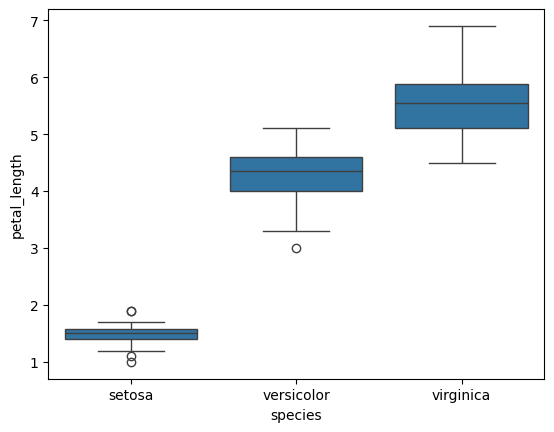

In [5]:
sns.boxplot(x='species', y='petal_length', data=iris)

In [22]:
from scipy.stats import shapiro

groups = iris.groupby('species')['petal_length']

for species, group in groups:
    stat, p = shapiro(group)
    print(f"species : {species:15} p-value : {p}")

species : setosa          p-value : 0.0548114671955363
species : versicolor      p-value : 0.15847783815657573
species : virginica       p-value : 0.10977536903223506


In [23]:
from scipy.stats import levene

setosa = list(groups)[0][1]
versicolor = list(groups)[1][1]
virginica = list(groups)[2][1]

stat, p = levene(setosa, versicolor, virginica)
print(f"p-value = {p}")

p-value = 3.1287566394085304e-08


In [25]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(setosa, versicolor, virginica)
print(f"p-value: {p_value}")

p-value: 2.856776610961989e-91


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=iris['petal_length'],
                          groups=iris['species'],
                          alpha=0.05)

print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


In [26]:
import pandas as pd

df = pd.read_csv('creditcard\creditcard.csv')

print(df.head())
print(df.info())
print(df.describe())

print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True))

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\hwons\AppData\Local\Temp\ipykernel_11076\344710051.py:3: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('creditcard\creditcard.csv')


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [11]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=10000, random_state=42)

df_sampled = pd.concat([fraud, normal], axis=0).sample(frac=1, random_state=42)  # 섞기

print(df_sampled['Class'].value_counts())

Class
0    10000
1      492
Name: count, dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_sampled['Amount_Scaled'] = scaler.fit_transform(df_sampled[['Amount']])
df_sampled.drop('Amount', axis=1, inplace=True)

# X, y 분리
X = df_sampled.drop('Class', axis=1)
y = df_sampled['Class']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


Class
0    0.953056
1    0.046944
Name: proportion, dtype: float64
Class
0    0.953311
1    0.046689
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train_smote.value_counts()) 


Class
0    7999
1    7999
Name: count, dtype: int64


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# 예측
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 평가
print(classification_report(y_test, y_pred, digits=4))
print("PR-AUC:", average_precision_score(y_test, y_proba))


              precision    recall  f1-score   support

           0     0.9916    0.9990    0.9953      2001
           1     0.9759    0.8265    0.8950        98

    accuracy                         0.9909      2099
   macro avg     0.9837    0.9128    0.9451      2099
weighted avg     0.9908    0.9909    0.9906      2099

PR-AUC: 0.9156887960343137
